# Análises de Dados com Pandas

## Sobre os dados

Terremotos: 
- API do USGS: https://earthquake.usgs.gov/fdsnws/event/1/

Ações Facebook:
- Preço das ações do Facebook ao longo de 2018 (obtido usando o pacote `stock_analysis`).

Meterológicos:
- Dados meteorológicos diários retirados da [API do National Centers for Environmental Information (NCEI)](https://www.ncdc.noaa.gov/cdo-web/webservices/v2). Consulte a [documentação](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf) do conjunto de dados para obter informações sobre os campos.

In [1]:
import datetime as dt
import pandas as pd
import requests

### Dados Terremotos

In [2]:
yesterday = dt.date.today() - dt.timedelta(days=1)
api = 'https://earthquake.usgs.gov/fdsnws/event/1/query'
payload = {
    'format': 'geojson',
    'starttime': yesterday - dt.timedelta(days=30),
    'endtime': yesterday
}
response = requests.get(api, params=payload)

response.status_code

200

In [3]:
earthquake_json = response.json()
earthquake_json

{'type': 'FeatureCollection',
 'metadata': {'generated': 1718057430000,
  'url': 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2024-05-10&endtime=2024-06-09',
  'title': 'USGS Earthquakes',
  'status': 200,
  'api': '1.14.1',
  'count': 10071},
 'features': [{'type': 'Feature',
   'properties': {'mag': 0.75,
    'place': '7 km NW of The Geysers, CA',
    'time': 1717891185480,
    'updated': 1717891280215,
    'tz': None,
    'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/nc75019162',
    'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=nc75019162&format=geojson',
    'felt': None,
    'cdi': None,
    'mmi': None,
    'alert': None,
    'status': 'automatic',
    'tsunami': 0,
    'sig': 9,
    'net': 'nc',
    'code': '75019162',
    'ids': ',nc75019162,',
    'sources': ',nc,',
    'types': ',nearby-cities,origin,phase-data,',
    'nst': 8,
    'dmin': 0.002749,
    'rms': 0.02,
    'gap': 68,
    'magType': 'md',
    'type'

In [4]:
earthquake_json.keys()

dict_keys(['type', 'metadata', 'features', 'bbox'])

In [5]:
earthquake_json['metadata']

{'generated': 1718057430000,
 'url': 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2024-05-10&endtime=2024-06-09',
 'title': 'USGS Earthquakes',
 'status': 200,
 'api': '1.14.1',
 'count': 10071}

In [6]:
earthquake_json['features'][0]

{'type': 'Feature',
 'properties': {'mag': 0.75,
  'place': '7 km NW of The Geysers, CA',
  'time': 1717891185480,
  'updated': 1717891280215,
  'tz': None,
  'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/nc75019162',
  'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=nc75019162&format=geojson',
  'felt': None,
  'cdi': None,
  'mmi': None,
  'alert': None,
  'status': 'automatic',
  'tsunami': 0,
  'sig': 9,
  'net': 'nc',
  'code': '75019162',
  'ids': ',nc75019162,',
  'sources': ',nc,',
  'types': ',nearby-cities,origin,phase-data,',
  'nst': 8,
  'dmin': 0.002749,
  'rms': 0.02,
  'gap': 68,
  'magType': 'md',
  'type': 'earthquake',
  'title': 'M 0.8 - 7 km NW of The Geysers, CA'},
 'geometry': {'type': 'Point',
  'coordinates': [-122.825668334961, 38.808666229248, 2.99000000953674]},
 'id': 'nc75019162'}

In [7]:
earthquake_properties_data = [
    quake['properties'] for quake in earthquake_json['features']
]
df = pd.DataFrame(earthquake_properties_data)
df.head()

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,ids,sources,types,nst,dmin,rms,gap,magType,type,title
0,0.75,"7 km NW of The Geysers, CA",1717891185480,1717891280215,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",nc75019162,",",nc,",",nearby-cities,origin,phase-data,",8.0,0.002749,0.02,68.0,md,earthquake,"M 0.8 - 7 km NW of The Geysers, CA"
1,0.75,"6 km NW of The Geysers, CA",1717891053950,1717891150460,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",nc75019157,",",nc,",",nearby-cities,origin,phase-data,",14.0,0.008134,0.02,73.0,md,earthquake,"M 0.8 - 6 km NW of The Geysers, CA"
2,1.64,"17 km SW of Oasis, CA",1717890846470,1718036377220,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ci40617703,",",ci,",",focal-mechanism,nearby-cities,origin,phase-da...",73.0,0.092940,0.19,23.0,ml,earthquake,"M 1.6 - 17 km SW of Oasis, CA"
3,1.02,"11 km NNW of Coso Junction, CA",1717890843030,1718034839947,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ci40617711,",",ci,",",nearby-cities,origin,phase-data,scitech-link,",15.0,0.118000,0.12,129.0,ml,earthquake,"M 1.0 - 11 km NNW of Coso Junction, CA"
4,0.23,"14 km E of Hebgen Lake Estates, Montana",1717890825000,1718051959440,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",uu80072011,",",uu,",",origin,phase-data,",8.0,0.013080,0.14,138.0,md,earthquake,"M 0.2 - 14 km E of Hebgen Lake Estates, Montana"


In [8]:
df.empty

False

In [9]:
df.shape

(10071, 26)

In [10]:
df.columns

Index(['mag', 'place', 'time', 'updated', 'tz', 'url', 'detail', 'felt', 'cdi',
       'mmi', 'alert', 'status', 'tsunami', 'sig', 'net', 'code', 'ids',
       'sources', 'types', 'nst', 'dmin', 'rms', 'gap', 'magType', 'type',
       'title'],
      dtype='object')

In [11]:
df.dtypes

mag        float64
place       object
time         int64
updated      int64
tz          object
url         object
detail      object
felt       float64
cdi        float64
mmi        float64
alert       object
status      object
tsunami      int64
sig          int64
net         object
code        object
ids         object
sources     object
types       object
nst        float64
dmin       float64
rms        float64
gap        float64
magType     object
type        object
title       object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10071 entries, 0 to 10070
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mag      10071 non-null  float64
 1   place    10071 non-null  object 
 2   time     10071 non-null  int64  
 3   updated  10071 non-null  int64  
 4   tz       0 non-null      object 
 5   url      10071 non-null  object 
 6   detail   10071 non-null  object 
 7   felt     583 non-null    float64
 8   cdi      583 non-null    float64
 9   mmi      156 non-null    float64
 10  alert    63 non-null     object 
 11  status   10071 non-null  object 
 12  tsunami  10071 non-null  int64  
 13  sig      10071 non-null  int64  
 14  net      10071 non-null  object 
 15  code     10071 non-null  object 
 16  ids      10071 non-null  object 
 17  sources  10071 non-null  object 
 18  types    10071 non-null  object 
 19  nst      8697 non-null   float64
 20  dmin     8687 non-null   float64
 21  rms      100

In [13]:
df.describe()

,mag,time,updated,felt,cdi,mmi,tsunami,sig,nst,dmin,rms,gap
count,10071.000000,1.007100e+04,1.007100e+04,583.000000,583.000000,156.000000,10071.000000,10071.000000,8697.000000,8687.000000,10071.000000,8697.000000
mean,1.545677,1.716593e+12,1.716796e+12,37.118353,2.501372,3.360788,0.000496,61.170490,23.440382,0.461942,0.262196,109.463716
std,1.252713,7.574667e+08,7.620961e+08,266.007127,1.361346,1.496684,0.022277,92.230006,22.264244,1.933375,0.427151,63.952255
min,-1.590000,1.715300e+12,1.715300e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,0.770000,1.715958e+12,1.716135e+12,1.000000,2.000000,2.858000,0.000000,9.000000,10.000000,0.011810,0.090000,64.000000
50%,1.360000,1.716561e+12,1.716917e+12,1.000000,2.200000,3.650500,0.000000,28.000000,17.000000,0.041860,0.160000,90.000000
75%,2.000000,1.717303e+12,1.717474e+12,4.000000,3.400000,4.227250,0.000000,62.000000,29.000000,0.103900,0.310000,138.050000
max,6.600000,1.717891e+12,1.718057e+12,3880.000000,8.900000,7.294000,1.000000,762.000000,303.000000,37.434000,33.380000,350.000000


In [14]:
df.describe(percentiles=[0.05, 0.95])

,mag,time,updated,felt,cdi,mmi,tsunami,sig,nst,dmin,rms,gap
count,10071.000000,1.007100e+04,1.007100e+04,583.000000,583.000000,156.000000,10071.000000,10071.000000,8697.000000,8687.000000,10071.000000,8697.000000
mean,1.545677,1.716593e+12,1.716796e+12,37.118353,2.501372,3.360788,0.000496,61.170490,23.440382,0.461942,0.262196,109.463716
std,1.252713,7.574667e+08,7.620961e+08,266.007127,1.361346,1.496684,0.022277,92.230006,22.264244,1.933375,0.427151,63.952255
min,-1.590000,1.715300e+12,1.715300e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
5%,-0.195000,1.715447e+12,1.715603e+12,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.003141,0.020000,38.000000
50%,1.360000,1.716561e+12,1.716917e+12,1.000000,2.200000,3.650500,0.000000,28.000000,17.000000,0.041860,0.160000,90.000000
95%,4.400000,1.717791e+12,1.717876e+12,79.700000,4.700000,5.485500,0.000000,298.000000,62.000000,2.567100,0.865000,250.180000
max,6.600000,1.717891e+12,1.718057e+12,3880.000000,8.900000,7.294000,1.000000,762.000000,303.000000,37.434000,33.380000,350.000000


In [15]:
df.describe(include=object)

,place,tz,url,detail,alert,status,net,code,ids,sources,types,magType,type,title
count,10071,0,10071,10071,63,10071,10071,10071,10071,10071,10071,10071,10071,10071
unique,4936,0,10071,10071,2,2,15,10065,10071,72,59,10,5,7709
top,"7 km NW of The Geysers, CA",NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,green,reviewed,nc,2024lchq,",nc75019162,",",nc,",",origin,phase-data,",ml,earthquake,"M 0.8 - 7 km NW of The Geysers, CA"
freq,247,NaN,1,1,62,6622,1874,2,1,1838,6106,6435,9920,64


In [16]:
df.mag.describe()

count    10071.000000
mean         1.545677
std          1.252713
min         -1.590000
25%          0.770000
50%          1.360000
75%          2.000000
max          6.600000
Name: mag, dtype: float64

In [17]:
df.alert.unique()

array([None, 'green', 'yellow'], dtype=object)

In [18]:
df.alert.value_counts()

alert
green     62
yellow     1
Name: count, dtype: int64

In [19]:
df[
    ['title', 'time']
    + [col for col in df.columns if col.startswith('mag')]
]

,title,time,mag,magType
0,"M 0.8 - 7 km NW of The Geysers, CA",1717891185480,0.75,md
1,"M 0.8 - 6 km NW of The Geysers, CA",1717891053950,0.75,md
2,"M 1.6 - 17 km SW of Oasis, CA",1717890846470,1.64,ml
3,"M 1.0 - 11 km NNW of Coso Junction, CA",1717890843030,1.02,ml
4,"M 0.2 - 14 km E of Hebgen Lake Estates, Montana",1717890825000,0.23,md
...,...,...,...,...
10066,"M 2.4 - 12 km ENE of Pāhala, Hawaii",1715300342840,2.42,ml
10067,"M 0.4 - 8 km WNW of Cobb, CA",1715300299660,0.40,md
10068,"M 0.8 - 7 km NNW of The Geysers, CA",1715299769980,0.78,md
10069,"M 1.5 - 34 km NW of Toyah, Texas",1715299748588,1.50,ml


In [20]:
df[['title', 'time']][100:103]

,title,time
100,"M 1.2 - 3 km N of Big Bear City, CA",1717879479860
101,"M 1.3 - 7 km NW of The Geysers, CA",1717879451570
102,"M 1.1 - 6 km NW of The Geysers, CA",1717879437850


In [21]:
df.loc[:, 'title']

0                     M 0.8 - 7 km NW of The Geysers, CA
1                     M 0.8 - 6 km NW of The Geysers, CA
2                          M 1.6 - 17 km SW of Oasis, CA
3                 M 1.0 - 11 km NNW of Coso Junction, CA
4        M 0.2 - 14 km E of Hebgen Lake Estates, Montana
                              ...                       
10066                M 2.4 - 12 km ENE of Pāhala, Hawaii
10067                       M 0.4 - 8 km WNW of Cobb, CA
10068                M 0.8 - 7 km NNW of The Geysers, CA
10069                   M 1.5 - 34 km NW of Toyah, Texas
10070                 M 1.3 - 9 km SSW of Willow, Alaska
Name: title, Length: 10071, dtype: object

In [22]:
df.loc[10:15, ['title', 'mag']]

,title,mag
10,"M 0.7 - 6 km WNW of Cobb, CA",0.69
11,"M 0.3 - 14 km NNE of West Yellowstone, Montana",0.26
12,"M 0.9 - 14 km E of Hebgen Lake Estates, Montana",0.91
13,"M 0.6 - 7 km NW of The Geysers, CA",0.62
14,"M 0.8 - 6 km NW of The Geysers, CA",0.75
15,"M 0.8 - 8 km NW of The Geysers, CA",0.83


In [23]:
df.iloc[10:15, [19, 8]]

,nst,cdi
10,8.0,NaN
11,8.0,NaN
12,13.0,NaN
13,10.0,NaN
14,13.0,NaN


In [24]:
df.iloc[10:15, 6:10]

,detail,felt,cdi,mmi
10,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN
11,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN
12,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN
13,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN
14,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN


In [25]:
df.mag > 2

0        False
1        False
2        False
3        False
4        False
         ...  
10066     True
10067    False
10068    False
10069    False
10070    False
Name: mag, Length: 10071, dtype: bool

In [26]:
df[df.mag >= 6.0]

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,ids,sources,types,nst,dmin,rms,gap,magType,type,title
2954,6.2,Kermadec Islands region,1717170881813,1717274650289,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.0,1.0,4.023,...,",us7000mp9e,usauto7000mp9e,",",us,usauto,",",dyfi,internal-moment-tensor,losspager,moment-...",181.0,0.965,0.83,52.0,mww,earthquake,M 6.2 - Kermadec Islands region
2956,6.2,Prince Edward Islands region,1717170369929,1717257041867,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,0.000,...,",usauto7000mp99,pt24152000,at00secx50,us7000mp99,",",usauto,pt,at,us,",",internal-moment-tensor,internal-origin,losspa...",215.0,7.841,0.62,16.0,mww,earthquake,M 6.2 - Prince Edward Islands region
4364,6.6,"68 km WNW of Fangale’ounga, Tonga",1716756430893,1717266277499,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,12.0,5.0,5.989,...,",at00se41qg,pt24147000,us6000n158,usauto6000n158,",",at,pt,us,usauto,",",dyfi,ground-failure,impact-link,internal-mome...",173.0,4.679,0.48,21.0,mww,earthquake,"M 6.6 - 68 km WNW of Fangale’ounga, Tonga"
4659,6.3,"83 km NW of Port-Vila, Vanuatu",1716675796060,1717907050195,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,16.0,5.0,5.676,...,",pt24146000,at00se2biv,us6000n102,usauto6000n102,",",pt,at,us,usauto,",",dyfi,ground-failure,impact-link,internal-mome...",280.0,4.819,0.73,28.0,mww,earthquake,"M 6.3 - 83 km NW of Port-Vila, Vanuatu"
6666,6.0,"162 km WSW of Nikolski, Alaska",1716111325025,1718012733422,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.0,1.0,4.693,...,",us6000mzme,at00sdq7z1,usauto6000mzme,pt241400...",",us,at,usauto,pt,ak,",",dyfi,ground-failure,impact-link,internal-mome...",303.0,0.868,1.04,59.0,mww,earthquake,"M 6.0 - 162 km WSW of Nikolski, Alaska"
9342,6.4,"25 km WSW of Brisas Barra de Suchiate, Mexico",1715513952829,1717861534040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,158.0,7.1,6.181,...,",us6000my20,usauto6000my20,at00sddf1e,pt24133000,",",us,usauto,at,pt,",",dyfi,ground-failure,impact-text,internal-mome...",234.0,0.486,1.25,30.0,mww,earthquake,"M 6.4 - 25 km WSW of Brisas Barra de Suchiate,..."


In [27]:
df.loc[
    df.mag >= 6.0,
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
2954,green,6.2,mww,M 6.2 - Kermadec Islands region,0,earthquake
2956,green,6.2,mww,M 6.2 - Prince Edward Islands region,0,earthquake
4364,green,6.6,mww,"M 6.6 - 68 km WNW of Fangale’ounga, Tonga",1,earthquake
4659,green,6.3,mww,"M 6.3 - 83 km NW of Port-Vila, Vanuatu",1,earthquake
6666,green,6.0,mww,"M 6.0 - 162 km WSW of Nikolski, Alaska",1,earthquake
9342,yellow,6.4,mww,"M 6.4 - 25 km WSW of Brisas Barra de Suchiate,...",0,earthquake


In [28]:
df.loc[
    (df.tsunami == 1) & (df.alert == 'green'),
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
4364,green,6.60,mww,"M 6.6 - 68 km WNW of Fangale’ounga, Tonga",1,earthquake
4659,green,6.30,mww,"M 6.3 - 83 km NW of Port-Vila, Vanuatu",1,earthquake
6275,green,4.05,mw,"M 4.1 - 17 km SE of Ocotillo Wells, CA",1,earthquake
6666,green,6.00,mww,"M 6.0 - 162 km WSW of Nikolski, Alaska",1,earthquake


In [29]:
df.loc[
    (df.tsunami == 1) | (df.alert == 'green'),
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
200,green,4.48,mw,"M 4.5 - 7 km NW of The Geysers, CA",0,earthquake
542,green,5.40,mb,M 5.4 - southern Mid-Atlantic Ridge,0,earthquake
546,green,5.40,mb,M 5.4 - southern Mid-Atlantic Ridge,0,earthquake
547,green,5.30,mww,"M 5.3 - 163 km WSW of Abepura, Indonesia",0,earthquake
548,green,4.26,mw,"M 4.3 - 64 km WNW of Bayview, CA",0,earthquake
...,...,...,...,...,...,...
9240,green,4.00,mw,"M 4.0 - 8 km NW of Delta, B.C., MX",0,earthquake
9250,green,4.86,mw,"M 4.9 - 9 km NNW of Delta, B.C., MX",0,earthquake
9456,green,5.40,mb,"M 5.4 - Kermadec Islands, New Zealand",0,earthquake
9928,green,5.60,mww,"M 5.6 - 103 km SSW of Kokopo, Papua New Guinea",0,earthquake


In [30]:
df.place.nunique()

4936

In [31]:
df.place.value_counts().sample(20)

place
107 km ESE of Chignik, Alaska                 1
4 km E of Butte, Montana                      3
8 km SSE of Volcano, Hawaii                  13
89 km W of Karluk, Alaska                     1
16 km E of Halibut Cove, Alaska               1
40 km SE of Perryville, Alaska                1
14 km SSE of Laytonville, CA                  2
5 km WSW of Cotati, CA                        1
49 km NNE of Lae, Papua New Guinea            1
10 km NNW of Julian, CA                       1
18 km SE of Waimea, Hawaii                    1
16 km ENE of Borrego Springs, CA              2
97 km S of McCarthy, Alaska                   1
6 km N of West Yellowstone, Montana           1
76 km NNW of Hughes, Alaska                   1
21 km E of Eielson Air Force Base, Alaska     1
0 km SE of Pāhala, Hawaii                     1
65 km SE of Pedro Bay, Alaska                 2
65 km SE of Denali National Park, Alaska      1
8 km N of Rancho Cucamonga, CA                1
Name: count, dtype: int64

In [32]:
df.loc[
    (df.place.str.contains('Alaska')) & (df.alert.notnull()),
    ['alert', 'mag', 'place', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,place,magType,title,tsunami,type
6666,green,6.0,"162 km WSW of Nikolski, Alaska",mww,"M 6.0 - 162 km WSW of Nikolski, Alaska",1,earthquake
8250,green,4.3,"41 km ENE of Susitna North, Alaska",ml,"M 4.3 - 41 km ENE of Susitna North, Alaska",0,earthquake


In [33]:
df.loc[
    (df.place.str.contains(r'CA|California$')) & (df.mag > 3.8),
    ['alert', 'place', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,place,mag,magType,title,tsunami,type
200,green,"7 km NW of The Geysers, CA",4.48,mw,"M 4.5 - 7 km NW of The Geysers, CA",0,earthquake
548,green,"64 km WNW of Bayview, CA",4.26,mw,"M 4.3 - 64 km WNW of Bayview, CA",0,earthquake
6275,green,"17 km SE of Ocotillo Wells, CA",4.05,mw,"M 4.1 - 17 km SE of Ocotillo Wells, CA",1,earthquake
6900,None,"5 km SSW of Brawley, CA",3.93,mw,"M 3.9 - 5 km SSW of Brawley, CA",0,earthquake
6972,None,"6 km SSW of Brawley, CA",3.83,mw,"M 3.8 - 6 km SSW of Brawley, CA",0,earthquake
8303,green,"9 km SE of Blue Lake, CA",4.02,mw,"M 4.0 - 9 km SE of Blue Lake, CA",0,earthquake


In [34]:
df['magType'].value_counts()

magType
ml       6435
md       2695
mb        787
mww        75
mwr        33
mw         21
mb_lg      12
mh         10
mwb         2
mlr         1
Name: count, dtype: int64

In [35]:
df.loc[
    df.magType.isin(['mw', 'mwb']),
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
200,green,4.48,mw,"M 4.5 - 7 km NW of The Geysers, CA",0,earthquake
548,green,4.26,mw,"M 4.3 - 64 km WNW of Bayview, CA",0,earthquake
1147,green,4.56,mw,"M 4.6 - 8 km N of Delta, B.C., MX",0,earthquake
1220,green,4.32,mw,"M 4.3 - 2 km NNW of Delta, B.C., MX",0,earthquake
1396,green,5.50,mwb,M 5.5 - West Chile Rise,0,earthquake
2427,None,3.41,mw,"M 3.4 - 8 km NE of Alum Rock, CA",0,earthquake
4137,None,3.57,mw,"M 3.6 - 3 km NE of Almanor, CA",0,earthquake
6275,green,4.05,mw,"M 4.1 - 17 km SE of Ocotillo Wells, CA",1,earthquake
6896,None,3.71,mw,"M 3.7 - 5 km S of Brawley, CA",0,earthquake
6900,None,3.93,mw,"M 3.9 - 5 km SSW of Brawley, CA",0,earthquake


In [36]:
[df.mag.idxmin(), df.mag.idxmax()]

[8095, 4364]

In [37]:
df.loc[
    [df.mag.idxmin(), df.mag.idxmax()],
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
8095,None,-1.59,ml,"M -1.6 - 62 km ENE of Pedro Bay, Alaska",0,earthquake
4364,green,6.60,mww,"M 6.6 - 68 km WNW of Fangale’ounga, Tonga",1,earthquake


In [38]:
df['source'] = 'USGS API'

In [39]:
df['mag_negative'] = df.mag < 0

In [40]:
df.head(2)

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,types,nst,dmin,rms,gap,magType,type,title,source,mag_negative
0,0.75,"7 km NW of The Geysers, CA",1717891185480,1717891280215,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",nearby-cities,origin,phase-data,",8.0,0.002749,0.02,68.0,md,earthquake,"M 0.8 - 7 km NW of The Geysers, CA",USGS API,False
1,0.75,"6 km NW of The Geysers, CA",1717891053950,1717891150460,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",nearby-cities,origin,phase-data,",14.0,0.008134,0.02,73.0,md,earthquake,"M 0.8 - 6 km NW of The Geysers, CA",USGS API,False


In [41]:
df.place.str.extract(r', (.*$)')[0].sort_values().unique()

array(['Afghanistan', 'Alaska', 'Aleutian Islands, Alaska', 'Angola',
       'Argentina', 'Arizona', 'Arkansas', 'Armenia', 'Azerbaijan',
       'B.C., MX', 'Bolivia', 'CA', 'California', 'Canada', 'Chile',
       'China', 'Colombia', 'Colorado', 'Costa Rica',
       'Democratic Republic of the Congo', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Ethiopia', 'Fiji', 'Georgia', 'Greece',
       'Guadeloupe', 'Guam', 'Guatemala', 'Hawaii', 'Honduras', 'Idaho',
       'Illinois', 'India', 'Indonesia', 'Iran', 'Iraq', 'Italy', 'Japan',
       'Japan region', 'Kansas', 'Kentucky', 'Kyrgyzstan', 'Louisiana',
       'Maldives', 'Mexico', 'Micronesia', 'Missouri', 'Montana',
       'Morocco', 'Mozambique', 'Myanmar', 'Nepal', 'Nevada',
       'New Caledonia', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'New Zealand', 'Nicaragua', 'Northern Mariana Islands',
       'Ohio', 'Oklahoma', 'Oregon', 'Pakistan', 'Panama',
       'Papua New Guinea', 'Peru', 'Philippines',

In [42]:
df['parsed_place'] = df.place.str.replace(
    r'.* of ', '', regex=True 
).str.replace(
    r'.* and ', '', regex=True
).str.replace(
    'the ', '' 
).str.replace(
    r'CA$', 'California', regex=True
).str.replace(
    r'MX$', 'Mexico', regex=True
).str.replace(
    r' region$', '', regex=True
).str.replace(
    'northern ', ''
).str.replace(
    r'^.*, ', '', regex=True
).str.strip()

In [43]:
df.parsed_place.sort_values().unique()

array(['Afghanistan', 'Africa', 'Alaska', 'Angola', 'Arctic Ocean',
       'Argentina', 'Arizona', 'Arkansas', 'Armenia', 'Azerbaijan',
       'Balleny Islands', 'Banda Sea', 'Bolivia', 'California', 'Canada',
       'Carlsberg Ridge', 'Chagos Archipelago', 'Chile', 'China',
       'Colombia', 'Colorado', 'Congo', 'Costa Rica',
       'Dominican Republic', 'Easter Island', 'Ecuador', 'El Salvador',
       'Ethiopia', 'Fiji', 'Fiji Islands', 'Futuna',
       'Galapagos Triple Junction', 'Georgia', 'Greece', 'Greenland Sea',
       'Guadeloupe', 'Guam', 'Guatemala', 'Hawaii', 'Honduras', 'Idaho',
       'Illinois', 'India', 'Indonesia', 'Iran', 'Iraq', 'Italy',
       'Jan Mayen', 'Japan', 'Kansas', 'Kentucky', 'Kermadec Islands',
       'Kuril Islands', 'Kyrgyzstan', 'Louisiana', 'Loyalty Islands',
       'Maldives', 'Mariana Islands', 'Mexico', 'Micronesia',
       'Mid-Atlantic Ridge', 'Mid-Indian Ridge', 'Missouri', 'Montana',
       'Morocco', 'Mozambique', 'Myanmar', 'Nepal', 'Neva

In [44]:
tsunami = df[df.tsunami == 1]
no_tsunami = df[df.tsunami == 0]

In [45]:
tsunami

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,nst,dmin,rms,gap,magType,type,title,source,mag_negative,parsed_place
2732,4.20,"30 km WNW of Anchor Point, Alaska",1717245623059,1717466892528,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,118.0,3.2,3.341,...,NaN,NaN,0.51,NaN,ml,earthquake,"M 4.2 - 30 km WNW of Anchor Point, Alaska",USGS API,False,Alaska
4364,6.60,"68 km WNW of Fangale’ounga, Tonga",1716756430893,1717266277499,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,12.0,5.0,5.989,...,173.0,4.6790,0.48,21.0,mww,earthquake,"M 6.6 - 68 km WNW of Fangale’ounga, Tonga",USGS API,False,Tonga
4659,6.30,"83 km NW of Port-Vila, Vanuatu",1716675796060,1717907050195,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,16.0,5.0,5.676,...,280.0,4.8190,0.73,28.0,mww,earthquake,"M 6.3 - 83 km NW of Port-Vila, Vanuatu",USGS API,False,Vanuatu
6275,4.05,"17 km SE of Ocotillo Wells, CA",1716207456030,1717791973322,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,484.0,4.3,4.624,...,83.0,0.1439,0.25,20.0,mw,earthquake,"M 4.1 - 17 km SE of Ocotillo Wells, CA",USGS API,False,California
6666,6.00,"162 km WSW of Nikolski, Alaska",1716111325025,1718012733422,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.0,1.0,4.693,...,303.0,0.8680,1.04,59.0,mww,earthquake,"M 6.0 - 162 km WSW of Nikolski, Alaska",USGS API,False,Alaska


In [46]:
no_tsunami.head(2)

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,nst,dmin,rms,gap,magType,type,title,source,mag_negative,parsed_place
0,0.75,"7 km NW of The Geysers, CA",1717891185480,1717891280215,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,8.0,0.002749,0.02,68.0,md,earthquake,"M 0.8 - 7 km NW of The Geysers, CA",USGS API,False,California
1,0.75,"6 km NW of The Geysers, CA",1717891053950,1717891150460,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,14.0,0.008134,0.02,73.0,md,earthquake,"M 0.8 - 6 km NW of The Geysers, CA",USGS API,False,California


In [47]:
pd.concat([tsunami, no_tsunami]).shape

(10071, 29)

In [48]:
df.drop(columns=['tz'], inplace=True)

In [49]:
df.head(2)

,mag,place,time,updated,url,detail,felt,cdi,mmi,alert,...,nst,dmin,rms,gap,magType,type,title,source,mag_negative,parsed_place
0,0.75,"7 km NW of The Geysers, CA",1717891185480,1717891280215,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,None,...,8.0,0.002749,0.02,68.0,md,earthquake,"M 0.8 - 7 km NW of The Geysers, CA",USGS API,False,California
1,0.75,"6 km NW of The Geysers, CA",1717891053950,1717891150460,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,None,...,14.0,0.008134,0.02,73.0,md,earthquake,"M 0.8 - 6 km NW of The Geysers, CA",USGS API,False,California


In [50]:
cols_to_drop = [
    col for col in df.columns
    if col not in ['mag', 'magType', 'time', 'place', 'tsunami', 'parsed_place']
]
cols_to_drop

['updated',
 'url',
 'detail',
 'felt',
 'cdi',
 'mmi',
 'alert',
 'status',
 'sig',
 'net',
 'code',
 'ids',
 'sources',
 'types',
 'nst',
 'dmin',
 'rms',
 'gap',
 'type',
 'title',
 'source',
 'mag_negative']

In [51]:
df.drop(columns=cols_to_drop, inplace=True)

In [52]:
df.head(2)

,mag,place,time,tsunami,magType,parsed_place
0,0.75,"7 km NW of The Geysers, CA",1717891185480,0,md,California
1,0.75,"6 km NW of The Geysers, CA",1717891053950,0,md,California


### Dados Ações Facebook

In [53]:
fb = pd.read_csv('data/fb_2018.csv', index_col='date', parse_dates=True)
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [54]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-01-02 to 2018-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    251 non-null    float64
 1   high    251 non-null    float64
 2   low     251 non-null    float64
 3   close   251 non-null    float64
 4   volume  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [55]:
fb.describe()

,open,high,low,close,volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,171.454424,173.615298,169.303110,171.510936,2.768798e+07
std,19.683435,19.423837,20.074382,19.977448,1.922117e+07
min,123.100000,129.740000,123.020000,124.060000,9.588587e+06
25%,157.815000,160.745000,155.525000,157.915000,1.782839e+07
50%,174.890000,176.980000,172.830000,174.700000,2.186093e+07
75%,184.890000,186.450000,183.420000,185.270000,3.031384e+07
max,215.715000,218.620000,214.270000,217.500000,1.698037e+08


In [56]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [57]:
fb = fb.assign(trading_volume=lambda x: pd.cut(x['volume'], bins=3, labels=['low', 'medium', 'high']))

In [58]:
fb['trading_volume'] = pd.cut(fb['volume'], bins=3, labels=['low', 'medium', 'high'])

In [59]:
fb.agg({
    'open': 'mean', 
    'high': 'max', 
    'low': 'min', 
    'close': 'mean', 
    'volume': 'sum'
})

open            171.45
high            218.62
low             123.02
close           171.51
volume   6949682394.00
dtype: float64

In [60]:
fb.groupby(by='trading_volume', observed=False).mean()

,open,high,low,close,volume
trading_volume,,,,,
low,171.36,173.46,169.31,171.43,24547207.71
medium,175.82,179.42,172.11,175.14,79072559.12
high,167.73,170.48,161.57,168.16,141924023.33


In [61]:
fb.groupby('trading_volume', observed=False)['close'].agg(['min', 'max', 'mean'])

,min,max,mean
trading_volume,,,
low,124.06,214.67,171.43
medium,152.22,217.50,175.14
high,160.06,176.26,168.16


In [62]:
fb_agg = fb.groupby('trading_volume', observed=False).agg({
    'open': 'mean',
    'high': ['min', 'max'],
    'low': ['min', 'max'],
    'close': 'mean'
})
fb_agg

open   high           low         close
                 mean    min    max    min    max   mean
trading_volume                                          
low            171.36 129.74 216.20 123.02 212.60 171.43
medium         175.82 162.85 218.62 150.75 214.27 175.14
high           167.73 161.10 180.13 149.02 173.75 168.16

In [63]:
fb_agg.columns

MultiIndex([( 'open', 'mean'),
            ( 'high',  'min'),
            ( 'high',  'max'),
            (  'low',  'min'),
            (  'low',  'max'),
            ('close', 'mean')],
           )

In [64]:
fb_agg.columns = ['_'.join(col_agg) for col_agg in fb_agg.columns]
fb_agg.head()

,open_mean,high_min,high_max,low_min,low_max,close_mean
trading_volume,,,,,,
low,171.36,129.74,216.20,123.02,212.60,171.43
medium,175.82,162.85,218.62,150.75,214.27,175.14
high,167.73,161.10,180.13,149.02,173.75,168.16


In [65]:
fb.head(2)

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903,low
2018-01-03,181.88,184.78,181.33,184.67,16886563,low


In [66]:
fb.pivot_table(columns='trading_volume', observed=False)

trading_volume,low,medium,high
close,171.43,175.14,168.16
high,173.46,179.42,170.48
low,169.31,172.11,161.57
open,171.36,175.82,167.73
volume,24547207.71,79072559.12,141924023.33


In [67]:
fb.pivot_table(columns='trading_volume', observed=False).T

,close,high,low,open,volume
trading_volume,,,,,
low,171.43,173.46,169.31,171.36,24547207.71
medium,175.14,179.42,172.11,175.82,79072559.12
high,168.16,170.48,161.57,167.73,141924023.33


In [68]:
pd.crosstab(
    index=fb.trading_volume,
    columns=fb.index.month,
    colnames=['month']
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,20,19,15,20,22,21,18,23,19,23,21,19
medium,1,0,4,1,0,0,2,0,0,0,0,0
high,0,0,2,0,0,0,1,0,0,0,0,0


In [69]:
pd.crosstab(
    index=fb.trading_volume,
    columns=fb.index.month,
    colnames=['month'],
    normalize='columns'
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,0.95,1.00,0.71,0.95,1.00,1.00,0.86,1.00,1.00,1.00,1.00,1.00
medium,0.05,0.00,0.19,0.05,0.00,0.00,0.10,0.00,0.00,0.00,0.00,0.00
high,0.00,0.00,0.10,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00


In [70]:
pd.crosstab(
    index=fb.trading_volume,
    columns=fb.index.month,
    colnames=['month'],
    values=fb.close,
    aggfunc='mean'
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,185.24,180.27,177.07,163.29,182.93,195.27,201.92,177.49,164.38,154.19,141.64,137.16
medium,179.37,NaN,164.76,174.16,NaN,NaN,194.28,NaN,NaN,NaN,NaN,NaN
high,NaN,NaN,164.11,NaN,NaN,NaN,176.26,NaN,NaN,NaN,NaN,NaN


In [71]:
import matplotlib.pyplot as plt

In [72]:
fb.head(2)

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903,low
2018-01-03,181.88,184.78,181.33,184.67,16886563,low


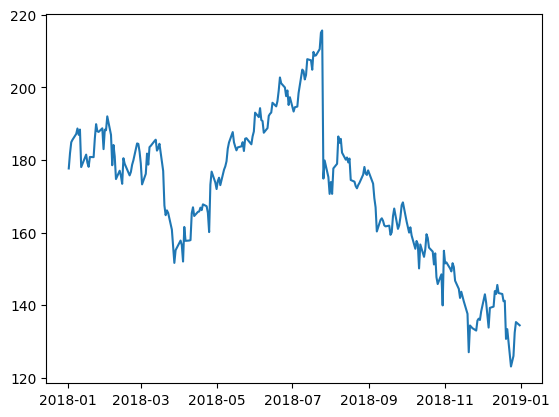

In [73]:
plt.plot(fb.index, fb.open)
plt.show()

<Axes: title={'center': 'Evolução dos preços das ações na abertura do Facebook em 2018'}, xlabel='date'>

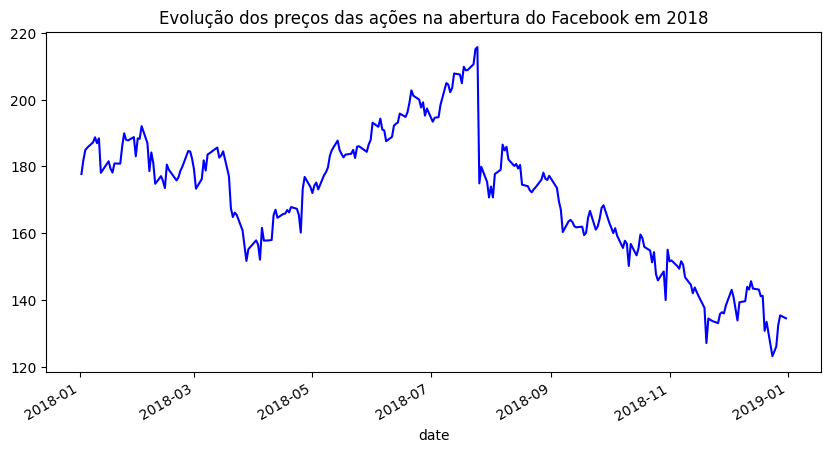

In [74]:
fb.plot(
    kind='line',
    y='open',
    figsize=(10, 5),
    style='-b',
    legend=False,
    title='Evolução dos preços das ações na abertura do Facebook em 2018'
)

<Axes: title={'center': 'Evolução dos preços das ações na abertura do Facebook em 2018'}, xlabel='date'>

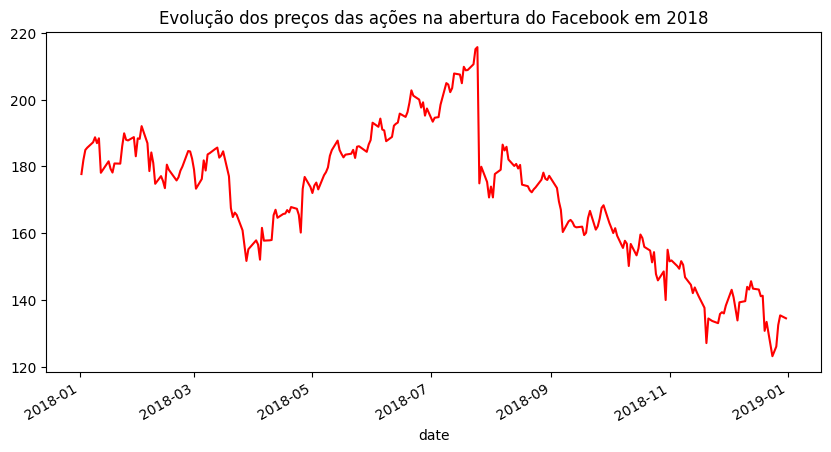

In [75]:
fb.plot(
    kind='line',
    y='open',
    figsize=(10, 5),
    color='red',
    linestyle='solid',
    legend=False,
    title='Evolução dos preços das ações na abertura do Facebook em 2018'
)

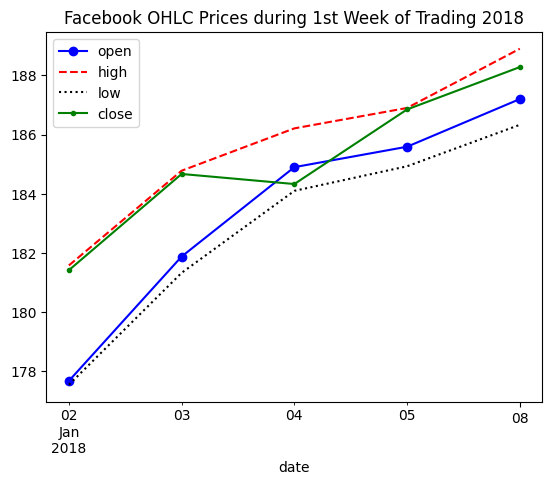

In [76]:
mask = (fb.index >= fb.index.min()) & (fb.index < fb.index.min() + pd.Timedelta('7D'))

fb.loc[mask].plot(
    y=['open', 'high', 'low', 'close'],
    style=['o-b', '--r', ':k', '.-g'],
    title='Facebook OHLC Prices during 1st Week of Trading 2018'
).autoscale()

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

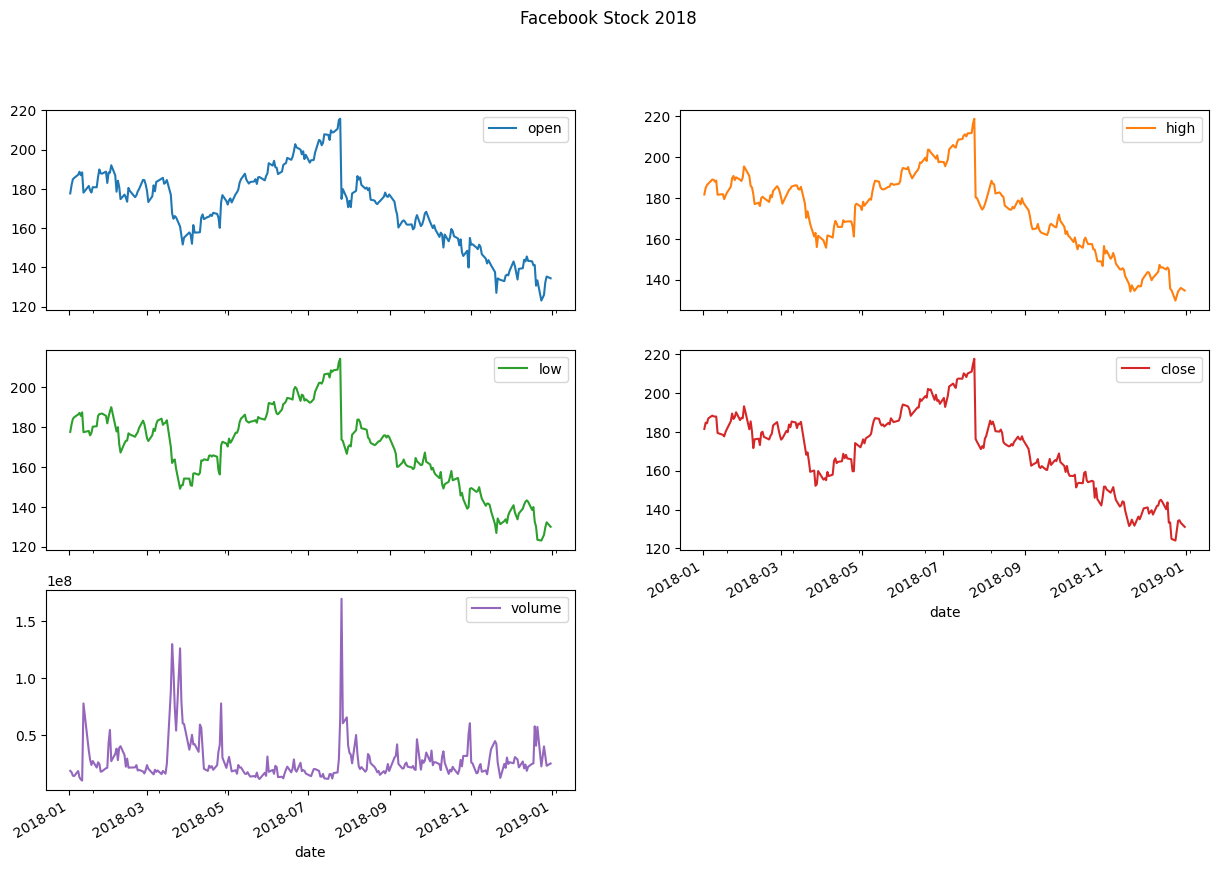

In [77]:
fb.plot(
    kind='line',
    subplots=True,
    layout=(3, 2),
    figsize=(15, 10),
    title='Facebook Stock 2018'
)

In [78]:
fb.head(2)

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903,low
2018-01-03,181.88,184.78,181.33,184.67,16886563,low


In [79]:
fb = fb.assign(
    max_abs_change=fb.high - fb.low
)
fb.head(2)

,open,high,low,close,volume,trading_volume,max_abs_change
date,,,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903,low,4.03
2018-01-03,181.88,184.78,181.33,184.67,16886563,low,3.45


<Axes: title={'center': 'Facebook Daily High - Low vs. Volume Traded'}, xlabel='volume', ylabel='max_abs_change'>

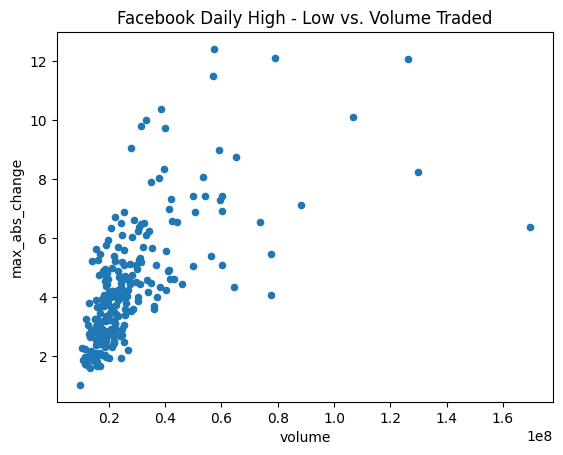

In [80]:
fb.plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. Volume Traded'
)

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

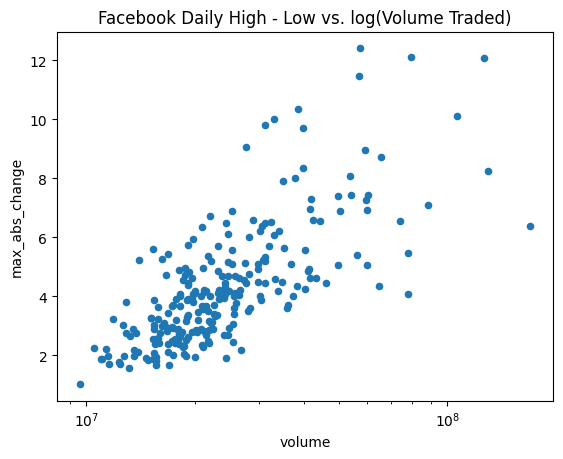

In [81]:
fb.plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)', 
    logx=True
)

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

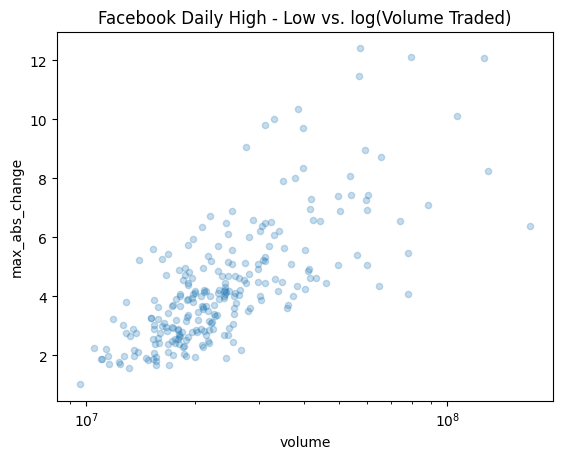

In [82]:
fb.plot(
    kind='scatter', x='volume', y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    logx=True, alpha=0.25
)

In [83]:
import numpy as np

fb = fb.assign(
    log_volume=np.log(fb.volume),
)
fb.head(2)

,open,high,low,close,volume,trading_volume,max_abs_change,log_volume
date,,,,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903,low,4.03,16.71
2018-01-03,181.88,184.78,181.33,184.67,16886563,low,3.45,16.64


<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='log_volume', ylabel='max_abs_change'>

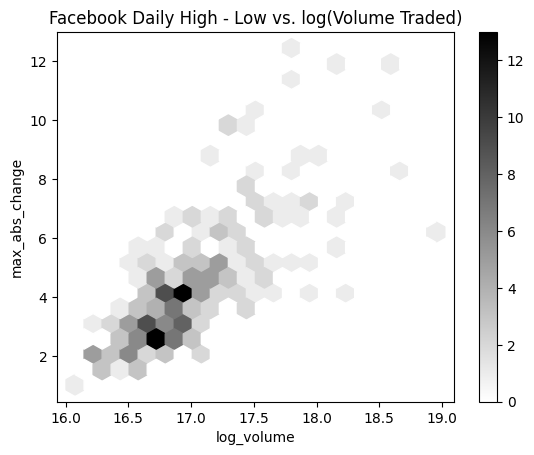

In [84]:
fb.plot(
    kind='hexbin',
    x='log_volume',
    y='max_abs_change',
    title='Facebook Daily High - Low vs. log(Volume Traded)',
    colormap='gray_r',
    gridsize=20, 
    sharex=False # we have to pass this to see the x-axis
)

Text(0.5, 0, 'Volume traded')

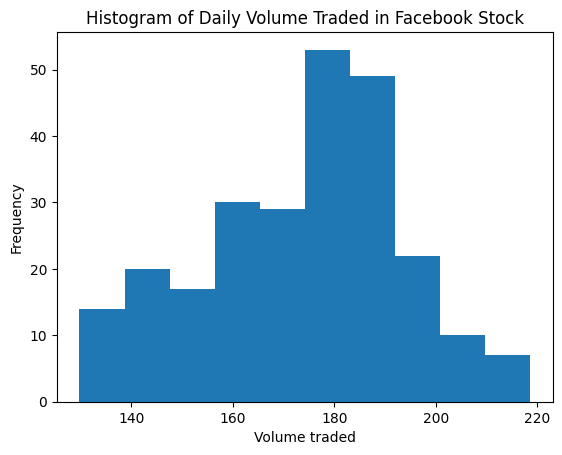

In [85]:
fb.high.plot(
    kind='hist', 
    title='Histogram of Daily Volume Traded in Facebook Stock'
)
plt.xlabel('Volume traded')

Text(0.5, 0, 'Price ($)')

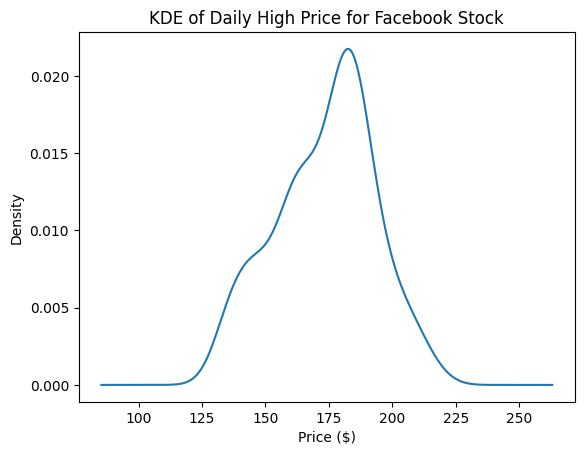

In [86]:
fb.high.plot(
    kind='kde', 
    title='KDE of Daily High Price for Facebook Stock'
)
plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)

Text(0.5, 0, 'Price ($)')

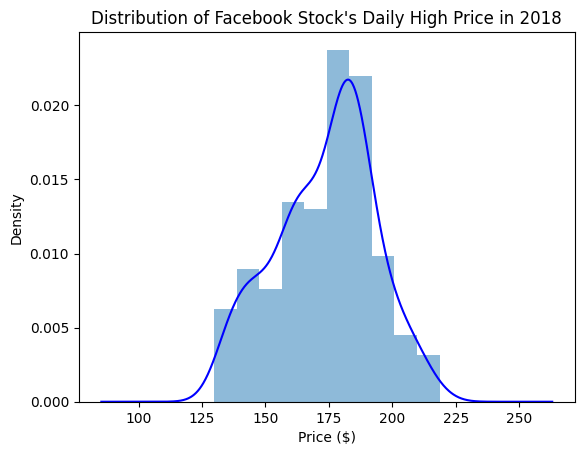

In [87]:
ax = fb.high.plot(kind='hist', density=True, alpha=0.5)
fb.high.plot(
    ax=ax, kind='kde', color='blue', 
    title='Distribution of Facebook Stock\'s Daily High Price in 2018'
)
plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)

Text(0, 0.5, 'price ($)')

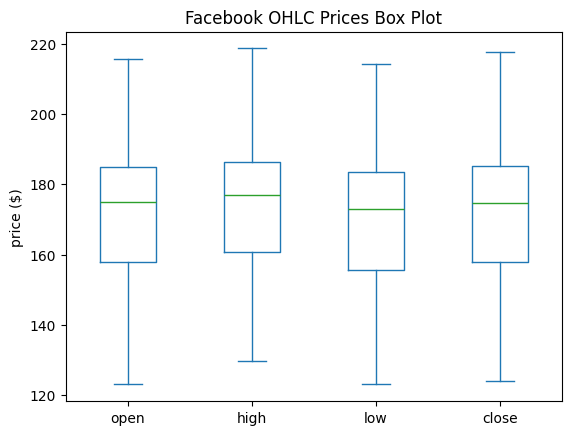

In [88]:
fb.iloc[:,:4].plot(kind='box', title='Facebook OHLC Prices Box Plot')
plt.ylabel('price ($)') # label the y-axis (discussed in chapter 6)

In [89]:
fb.head(2)

,open,high,low,close,volume,trading_volume,max_abs_change,log_volume
date,,,,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903,low,4.03,16.71
2018-01-03,181.88,184.78,181.33,184.67,16886563,low,3.45,16.64


Text(0.5, 1.1, 'Facebook OHLC Box Plots by Volume Traded')

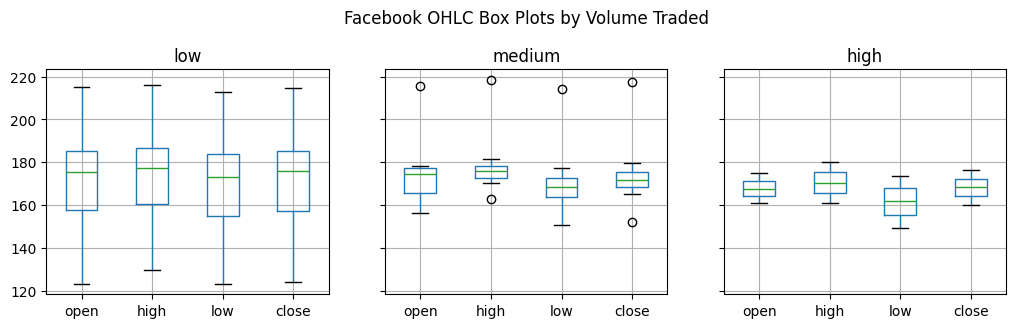

In [90]:
fb.groupby('trading_volume', observed=False).boxplot(
    column=['open', 'high', 'low', 'close'],
    layout=(1, 3), figsize=(12, 3)
)
plt.suptitle('Facebook OHLC Box Plots by Volume Traded', y=1.1)

### Dados Estações Meteorológicas

In [2]:
weather = pd.read_csv('data/nyc_weather_2018.csv')
weather.head()

,date,datatype,station,attributes,value
0,2018-01-01T00:00:00,PRCP,GHCND:US1CTFR0039,",,N,",0.0
1,2018-01-01T00:00:00,PRCP,GHCND:US1NJBG0015,",,N,",0.0
2,2018-01-01T00:00:00,SNOW,GHCND:US1NJBG0015,",,N,",0.0
3,2018-01-01T00:00:00,PRCP,GHCND:US1NJBG0017,",,N,",0.0
4,2018-01-01T00:00:00,SNOW,GHCND:US1NJBG0017,",,N,",0.0


In [3]:
snow_data = weather.query('datatype == "SNOW" and value > 0 and station.str.contains("US1NY")')
snow_data.head()

,date,datatype,station,attributes,value
114,2018-01-01T00:00:00,SNOW,GHCND:US1NYWC0019,",,N,",25.0
789,2018-01-04T00:00:00,SNOW,GHCND:US1NYNS0007,",,N,",41.0
794,2018-01-04T00:00:00,SNOW,GHCND:US1NYNS0018,",,N,",10.0
798,2018-01-04T00:00:00,SNOW,GHCND:US1NYNS0024,",,N,",89.0
800,2018-01-04T00:00:00,SNOW,GHCND:US1NYNS0030,",,N,",102.0


```sql
SELECT * 
FROM weather 
WHERE datatype == "SNOW" AND value > 0 AND station LIKE "%US1NY%"
```

In [4]:
station_info = pd.read_csv('data/weather_stations.csv')
station_info.head()

,id,name,latitude,longitude,elevation
0,GHCND:US1CTFR0022,"STAMFORD 2.6 SSW, CT US",41.064100,-73.577000,36.6
1,GHCND:US1CTFR0039,"STAMFORD 4.2 S, CT US",41.037788,-73.568176,6.4
2,GHCND:US1NJBG0001,"BERGENFIELD 0.3 SW, NJ US",40.921298,-74.001983,20.1
3,GHCND:US1NJBG0002,"SADDLE BROOK TWP 0.6 E, NJ US",40.902694,-74.083358,16.8
4,GHCND:US1NJBG0003,"TENAFLY 1.3 W, NJ US",40.914670,-73.977500,21.6


In [5]:
weather.shape

(78780, 5)

In [6]:
station_info.shape

(279, 5)

In [7]:
station_info.id.describe()

count                   279
unique                  279
top       GHCND:US1CTFR0022
freq                      1
Name: id, dtype: object

In [8]:
station_info.id.nunique()

279

In [12]:
inner_join = weather.merge(station_info, left_on='station', right_on='id', how='inner')
inner_join.sample(5, random_state=0)

,date,datatype,station,attributes,value,id,name,latitude,longitude,elevation
10739,2018-02-17T00:00:00,PRCP,GHCND:USC00066655,",,7,0700",4.1,GHCND:USC00066655,"PUTNAM LAKE, CT US",41.082500,-73.638600,91.4
45188,2018-07-27T00:00:00,SNOW,GHCND:US1NJES0019,",,N,",0.0,GHCND:US1NJES0019,"WEST CALDWELL TWP 1.3 NE, NJ US",40.861500,-74.277500,81.4
59823,2018-10-05T00:00:00,PRCP,GHCND:US1NJES0024,",,N,",0.0,GHCND:US1NJES0024,"CEDAR GROVE TWP 0.4 W, NJ US",40.855695,-74.235564,108.5
10852,2018-02-17T00:00:00,TMIN,GHCND:USW00094789,",,W,2400",-2.1,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.639150,-73.764010,3.4
46755,2018-08-03T00:00:00,AWND,GHCND:USW00094745,",,W,",1.8,GHCND:USW00094745,"WESTCHESTER CO AIRPORT, NY US",41.062360,-73.704630,111.9


In [13]:
inner_join.shape

(78780, 10)

In [14]:
station_info.rename({'id':'station'}, axis=1, inplace=True)

In [15]:
station_info.head(2)

,station,name,latitude,longitude,elevation
0,GHCND:US1CTFR0022,"STAMFORD 2.6 SSW, CT US",41.064100,-73.577000,36.6
1,GHCND:US1CTFR0039,"STAMFORD 4.2 S, CT US",41.037788,-73.568176,6.4


In [19]:
inner_join = weather.merge(station_info, on='station', how='inner')
inner_join.sample(5, random_state=0)

,date,datatype,station,attributes,value,name,latitude,longitude,elevation
10739,2018-02-17T00:00:00,PRCP,GHCND:USC00066655,",,7,0700",4.1,"PUTNAM LAKE, CT US",41.082500,-73.638600,91.4
45188,2018-07-27T00:00:00,SNOW,GHCND:US1NJES0019,",,N,",0.0,"WEST CALDWELL TWP 1.3 NE, NJ US",40.861500,-74.277500,81.4
59823,2018-10-05T00:00:00,PRCP,GHCND:US1NJES0024,",,N,",0.0,"CEDAR GROVE TWP 0.4 W, NJ US",40.855695,-74.235564,108.5
10852,2018-02-17T00:00:00,TMIN,GHCND:USW00094789,",,W,2400",-2.1,"JFK INTERNATIONAL AIRPORT, NY US",40.639150,-73.764010,3.4
46755,2018-08-03T00:00:00,AWND,GHCND:USW00094745,",,W,",1.8,"WESTCHESTER CO AIRPORT, NY US",41.062360,-73.704630,111.9


In [23]:
left_join = station_info.merge(weather, on='station', how='left')
left_join.sample(5, random_state=0)

,station,name,latitude,longitude,elevation,date,datatype,attributes,value
61522,GHCND:USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",40.73417,-73.416940,24.7,2018-02-02T00:00:00,WDF2,",,W,",330.0
72979,GHCND:USW00094745,"WESTCHESTER CO AIRPORT, NY US",41.06236,-73.704630,111.9,2018-06-28T00:00:00,WDF5,",,W,",180.0
66624,GHCND:USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.969250,42.7,2018-07-14T00:00:00,AWND,",,W,",1.6
16698,GHCND:US1NJMS0070,"CHATHAM TWP 1.1 NNW, NJ US",40.74129,-74.439495,75.0,2018-09-01T00:00:00,PRCP,",,N,",3.6
38272,GHCND:USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.396350,85.3,2018-09-26T00:00:00,SNOW,",,7,",0.0


In [34]:
weather['date'] = pd.to_datetime(weather.date)
weather.head()

,date,datatype,station,attributes,value
0,2018-01-01,PRCP,GHCND:US1CTFR0039,",,N,",0.0
1,2018-01-01,PRCP,GHCND:US1NJBG0015,",,N,",0.0
2,2018-01-01,SNOW,GHCND:US1NJBG0015,",,N,",0.0
3,2018-01-01,PRCP,GHCND:US1NJBG0017,",,N,",0.0
4,2018-01-01,SNOW,GHCND:US1NJBG0017,",,N,",0.0


In [35]:
weather.set_index('date', inplace=True)

In [37]:
weather.head(2)

,datatype,station,attributes,value
date,,,,
2018-01-01,PRCP,GHCND:US1CTFR0039,",,N,",0.0
2018-01-01,PRCP,GHCND:US1NJBG0015,",,N,",0.0


In [39]:
weather.query('datatype == "PRCP"')\
    .groupby(level=0)['value'].mean()

date
2018-01-01     0.000000
2018-01-02     0.000000
2018-01-03     0.000000
2018-01-04     5.070370
2018-01-05    12.025926
                ...    
2018-12-27     0.000000
2018-12-28    10.673750
2018-12-29    18.341026
2018-12-30     0.068493
2018-12-31     4.128767
Name: value, Length: 365, dtype: float64

In [41]:
weather.query('datatype == "PRCP"')\
    .groupby(level=0)['value'].mean()\
    .groupby(pd.Grouper(freq='ME')).sum().nlargest(3)

date
2018-11-30    210.571087
2018-08-31    193.961927
2018-09-30    192.718931
Name: value, dtype: float64

In [42]:
snow_data = weather.query('datatype == "SNOW"')
snow_data.head(2)

,datatype,station,attributes,value
date,,,,
2018-01-01,SNOW,GHCND:US1NJBG0015,",,N,",0.0
2018-01-01,SNOW,GHCND:US1NJBG0017,",,N,",0.0


In [56]:
pd.crosstab(
    index=snow_data.station,
    columns=snow_data.index.month,
    colnames=['month'],
    values=snow_data.value,
    aggfunc=lambda x: (x > 0).sum(),
    margins=True, 
    margins_name='total observations of snow')

month,1,2,3,4,5,6,7,8,9,10,11,12,total observations of snow
station,,,,,,,,,,,,,
GHCND:US1CTFR0039,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4
GHCND:US1NJBG0003,1.0,2.0,7.0,2.0,0.0,0.0,NaN,0.0,0.0,0.0,2.0,1.0,15
GHCND:US1NJBG0015,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7
GHCND:US1NJBG0017,6.0,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15
GHCND:US1NJBG0018,5.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
GHCND:USW00014734,3.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11
GHCND:USW00094728,4.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11
GHCND:USW00094741,NaN,3.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,9


In [57]:
snow_data.loc[(snow_data.value > 0) & (snow_data.station == 'GHCND:US1CTFR0039')]

,datatype,station,attributes,value
date,,,,
2018-01-30,SNOW,GHCND:US1CTFR0039,",,N,",57.0
2018-02-18,SNOW,GHCND:US1CTFR0039,",,N,",133.0
2018-03-22,SNOW,GHCND:US1CTFR0039,",,N,",165.0
2018-04-02,SNOW,GHCND:US1CTFR0039,",,N,",184.0
